In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Zomato_data.csv")
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
def handleRate(value) :
    value = str(value).split("/")
    value = value[0];
    return float(value)

data["rate"] = data["rate"].apply(handleRate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [10]:
data.shape

(148, 7)

In [11]:
data.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


[Text(0.5, 0, 'Types Of Restaurants'), Text(0, 0.5, 'Count Of Restaurants')]

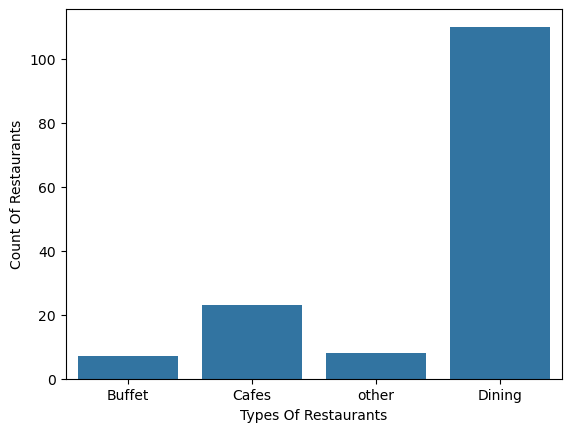

In [17]:
CountResta = sns.countplot(x = data["listed_in(type)"])
CountResta.set(xlabel = "Types Of Restaurants" , ylabel = "Count Of Restaurants")

Conclusion - Majority Of Restaurants falls In the Dinning Category

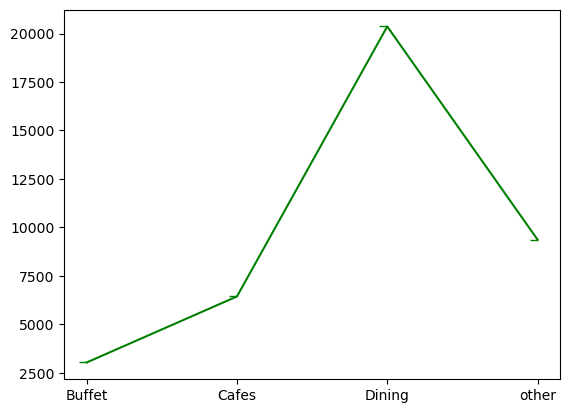

In [22]:
GroupedData = data.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes":GroupedData})
VoteCount = plt.plot(result , c="green" , marker = 0)                           

Conclusion = Dinning Restaurant Has The Highest Votes

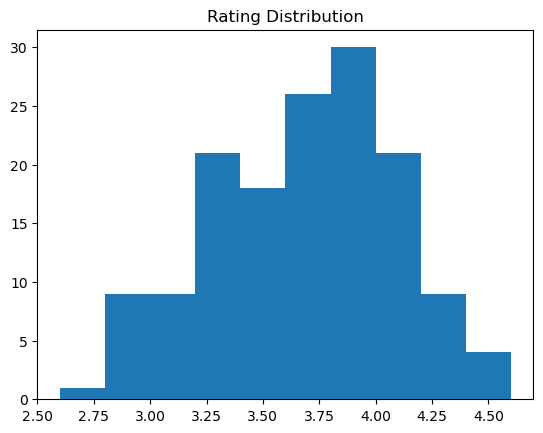

In [7]:
plt.hist(data["rate"] , bins = 10)
plt.title("Rating Distribution")
plt.show()

Conclusion = The Majority Restaurant Receive The Rating Of 4.00

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

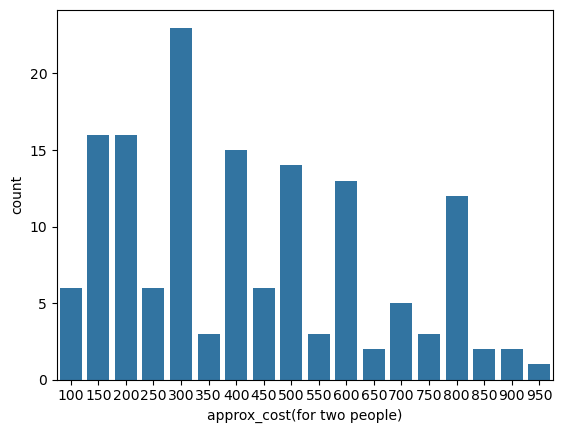

In [9]:
Couple_Data = data["approx_cost(for two people)"]
sns.countplot(x =Couple_Data)

Conclusion = Maximum Couples Orders Of 300 Rupees

<Axes: xlabel='online_order', ylabel='rate'>

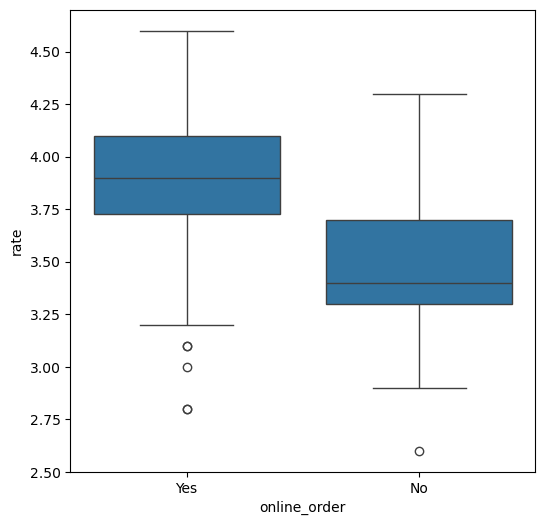

In [11]:
plt.figure(figsize=(6,6))
sns.boxplot(x = "online_order" , y = "rate" , data = data)

Conclusion = Online Orders Receive Good Rating As Compares To The Offline Orders

Text(0.5, 1.0, 'Heatmap')

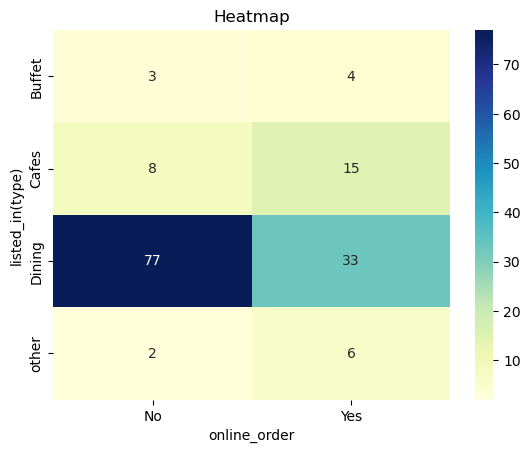

In [12]:
pivot_table = data.pivot_table(index= "listed_in(type)" , columns = "online_order" , aggfunc = "size" , fill_value = 0)
sns.heatmap(pivot_table , annot = True , cmap = "YlGnBu" , fmt = "d")
plt.title("Heatmap")

Conclusion = Dinning Receive Offline Orders More Than Online , Buffet Receive Online Order More Than Offline , Cafes Receive Online Order 
More Than Offline , Other Receive Online Order More Than Offline.